# Case Study on Probability for Data Science


### Problem statement

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset. (Along with other ML algorithms, Naïve Bayes’ Classifier should be applied) Also, if some data pre-processing is necessary do that as well.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

## Read the Dataset

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print("shape:", df.shape)


shape: (8124, 23)


In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### No null values present

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Label Encoding

In [22]:
#label encoding 
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# Splitting the dataset into features and target set.

x = df.drop(['class'],axis=1) #features
y = df['class'] #target

In [9]:
# Performing one hot encoding in fetures.

x = pd.get_dummies(x)

#### Splitting dataset

In [10]:
# Splitting the data set into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.3)

## Model building


## 1.Logistic Regression

In [11]:
classifier = LogisticRegression(solver='liblinear',C=10.0,random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [12]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


## 2. Decision Tree Classification


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


## 3.Random Forest Classification

In [14]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [15]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'weighted'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'weighted'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'weighted'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


## 4. KNN Classification

In [16]:
acc = []
for i in (np.arange(3,12)):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    acc.append(acc_score)

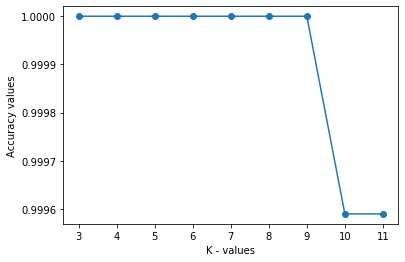

In [17]:
plt.plot(np.arange(3,12), acc, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [18]:
# We can take k-value 4 which also shows high accuracy

classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))                 

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


## 5. Naive Bayes Classification


### Naive Bayes  Gaussian Classification

In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy: 96.43%


In [20]:
y_pred_nb = nb.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred_nb))
print("Precision is: ", precision_score(y_test,y_pred_nb, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred_nb,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred_nb,  average = 'micro'))

Accuracy is:  0.9643150123051681
Precision is:  0.9643150123051681
Recall is:  0.9643150123051681
F1 score is:  0.9643150123051681


### Naive Bayes Bernoulli Classfier

In [21]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))     

Accuracy is:  0.9343724364232978
Precision is:  0.9343724364232978
Recall is:  0.9343724364232978
F1 score is:  0.9343724364232978


| Model | F1-score | Accuracy | Precision |
| ------- | -------- | ------- | -------- |
| Logistic Regression | 1 | 1 | 1 |
|Random Forest | 1 | 1 | 1 |
| KNN | 1 | 1 | 1 |
| Decision Tree | 1 | 1 | 1 |
| Bayes Gaussian | 0.96 | 0.96 |0.96 |
| Bayes Bernoulli | 0.93 | 0.93 | 0.93 |


### Most of the classification methods hit 100% accuracy with this dataset.
